In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
#x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#coordinates = zip(x, y)

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
city_data=[]

In [8]:
print("Beginning Data Retrieval         ")
print("---------------------------------")

Beginning Data Retrieval         
---------------------------------


In [9]:
record_count = 1
set_count = 1

In [ ]:
for i, city in enumerate(cities):

    if (i%50 and i > 50):
        set_count += 1
        record_count = 1
        
    city_url = url + "&q=" + city.replace(" ", "+")
    print(f'Processing record of {record_count} of Set {set_count}) | {city}')
    
    record_count += 1
          
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing record of 1 of Set 1) | guerrero negro
Processing record of 2 of Set 1) | rikitea
Processing record of 3 of Set 1) | keti bandar
Processing record of 4 of Set 1) | muscat
Processing record of 5 of Set 1) | grand river south east
City not found. Skipping...
Processing record of 6 of Set 1) | georgetown
Processing record of 7 of Set 1) | codrington
Processing record of 8 of Set 1) | aguas formosas
Processing record of 9 of Set 1) | kodiak
Processing record of 10 of Set 1) | buala
Processing record of 11 of Set 1) | cachoeira do sul
Processing record of 12 of Set 1) | marawi
Processing record of 13 of Set 1) | punta arenas
Processing record of 14 of Set 1) | dingle
Processing record of 15 of Set 1) | pemangkat
Processing record of 16 of Set 1) | albany
Processing record of 17 of Set 1) | victoria
Processing record of 18 of Set 1) | sept-iles
Processing record of 19 of Set 1) | ushuaia
Processing record of 20 of Set 1) | hirtshals
Processing record of 21 of Set 1) | illoqqortoor

In [11]:
len(city_data)

558

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,39.22,81,75,12.66,CL,2021-07-24 15:28:47
1,Balaipungut,1.0500,101.2833,82.81,87,58,0.40,ID,2021-07-24 15:41:54
2,Tuktoyaktuk,69.4541,-133.0374,53.60,71,40,14.97,CA,2021-07-24 15:33:48
3,Kodinsk,58.6881,99.1844,66.24,64,17,3.15,RU,2021-07-24 15:41:55
4,Opuwo,-18.0607,13.8400,74.61,9,0,10.67,NA,2021-07-24 15:41:55
5,Kaeo,-35.1000,173.7833,53.33,89,42,9.84,NZ,2021-07-24 15:41:56
6,Alta Floresta,-9.8756,-56.0861,93.02,33,0,11.50,BR,2021-07-24 15:41:56
7,Severo-Kurilsk,50.6789,156.1250,53.94,96,85,2.73,RU,2021-07-24 15:41:56
8,Takoradi,4.8845,-1.7554,77.94,70,80,9.22,GH,2021-07-24 15:41:57
9,Merrill,45.1805,-89.6835,74.17,92,75,5.75,US,2021-07-24 15:41:57


In [13]:
city_columns = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]
city_data_df = city_data_df[city_columns]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-07-24 15:28:47,-53.1500,-70.9167,39.22,81,75,12.66
1,Balaipungut,ID,2021-07-24 15:41:54,1.0500,101.2833,82.81,87,58,0.40
2,Tuktoyaktuk,CA,2021-07-24 15:33:48,69.4541,-133.0374,53.60,71,40,14.97
3,Kodinsk,RU,2021-07-24 15:41:55,58.6881,99.1844,66.24,64,17,3.15
4,Opuwo,NA,2021-07-24 15:41:55,-18.0607,13.8400,74.61,9,0,10.67


In [14]:
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

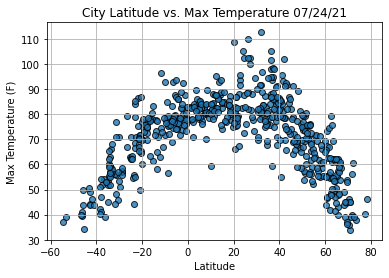

In [16]:
import time
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths = 1,marker ="o",
           alpha = 0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

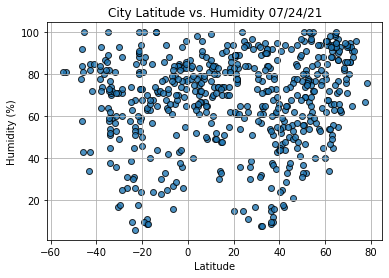

In [17]:
plt.scatter(lats,
           humidity,
           edgecolor = "black", linewidths = 1, marker ="o",
           alpha = 0.8, label = "Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")

plt.show

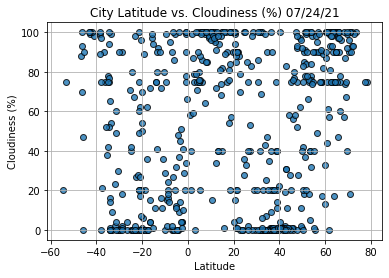

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

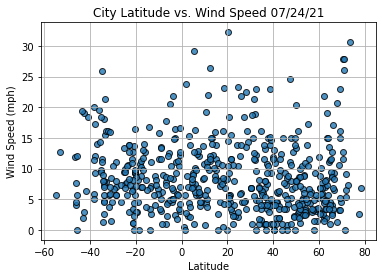

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [33]:
from scipy.stats import linregress

In [51]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordintes):
    # Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, (10,40), fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}'+ f'  Corellation: {r_value :.2f}')
    plt.title(title)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                    Tuatapere
Country                        NZ
Date          2021-07-24 15:28:52
Lat                      -46.1333
Lng                      167.6833
Max Temp                    39.81
Humidity                       84
Cloudiness                    100
Wind Speed                   7.61
Name: 13, dtype: object

In [25]:
city_data_df.loc[city_data_df["Lat"]>=0].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Balaipungut,ID,2021-07-24 15:41:54,1.0500,101.2833,82.81,87,58,0.40
2,Tuktoyaktuk,CA,2021-07-24 15:33:48,69.4541,-133.0374,53.60,71,40,14.97
3,Kodinsk,RU,2021-07-24 15:41:55,58.6881,99.1844,66.24,64,17,3.15
7,Severo-Kurilsk,RU,2021-07-24 15:41:56,50.6789,156.1250,53.94,96,85,2.73
8,Takoradi,GH,2021-07-24 15:41:57,4.8845,-1.7554,77.94,70,80,9.22


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

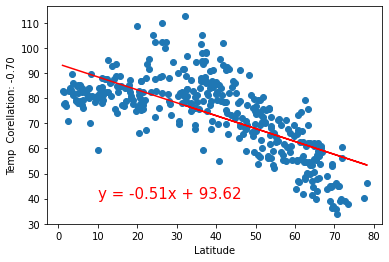

In [37]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Linear Regression on Maximum Temperature \for Northern Hemisphere", "Max Temp", (10,40))


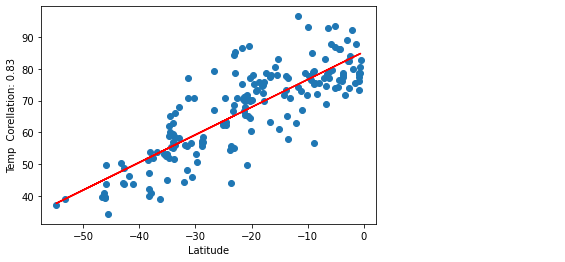

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

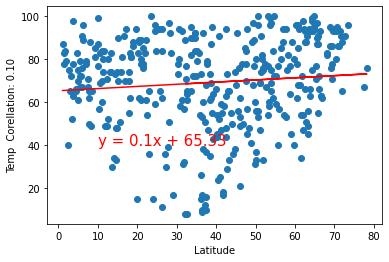

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


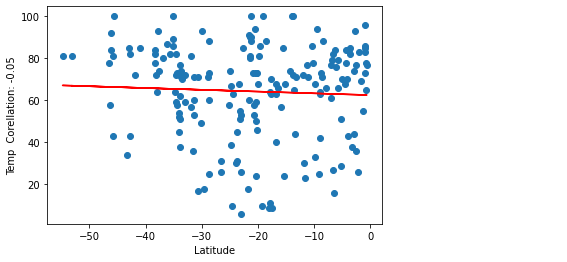

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,35))

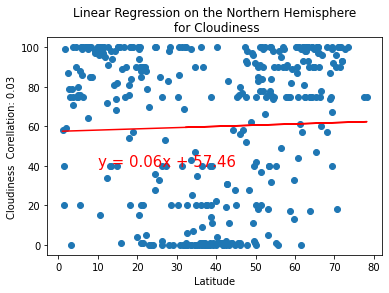

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Cloudiness', 'Cloudiness',(40,10))


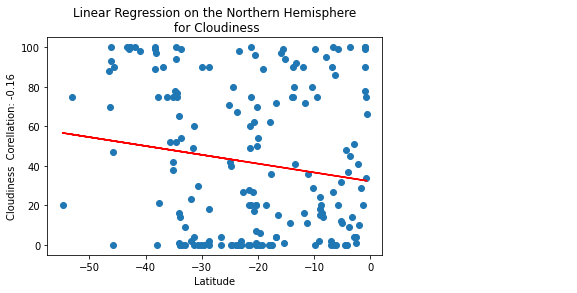

In [53]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Cloudiness', 'Cloudiness',(40,10))


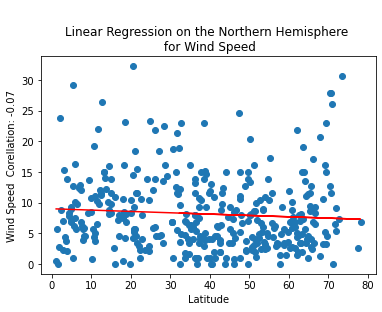

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))


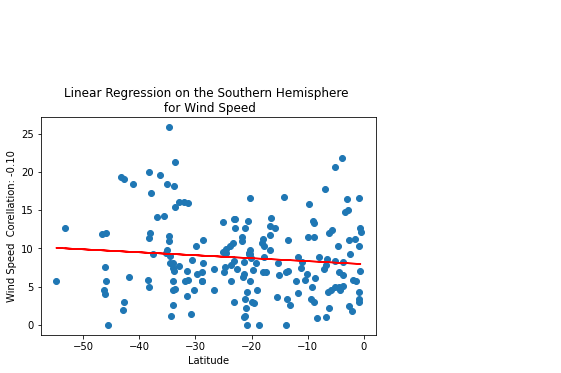

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))